# Lending Club Case Study

Analysis by

1. Sreevalli Karanam(Group Facilitator)
2. Sandhya Girish


**Problem Statement**

Consumer finance company specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [186]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd #To work with dataset
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
import warnings
warnings.filterwarnings("ignore")

In [187]:
#Displays all the rows
pd.set_option('display.max_rows', None)
#Standardise precision
pd.options.display.float_format = "{:,.2f}".format
#Set style for plots
sns.set(style = "whitegrid")

In [188]:
#Read the input file 'loan.csv' which contains the data for all the consumers who have applied for loan and where loan is approved
df_loan= pd.read_csv("loan.csv")
#Display first few rows
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [189]:
#check the shape of the dataframe
df_loan.shape

(39717, 111)

Here are 39717 rows & 111 columns in loan.csv file

In [190]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

1. Fix Rows and columns
2. Fix Missing values
3. Standardise values
4. Fix Invalid values
5. Filter data

In [191]:
# Count the number of missing values in each column of the dataset
df_loan.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


This shows that there are several empty columns in the dataset

In [192]:
# Counting the number of rows have all missing values
print('Number of empty Rows:')
print(df_loan.isnull().all(axis=1).sum())
# --> There are no empty rows in whole dataset.

# Counting the number of columns have all missing values
print('Number of empty Columns:')
print(df_loan.isnull().all(axis=0).sum())

# --> There are several empty columns in whole dataset.

Number of empty Rows:
0
Number of empty Columns:
54


There are no empty rows in whole dataset.
There are 54 empty columns in whole dataset. Delete these columns

In [193]:
# to delete the columns which contains all null values 
df_loan = df_loan.dropna(axis=1, how='all')
df_loan.shape # Get the shape of the dataframe after deleting null columns

(39717, 57)

In [194]:
#Using the describe function, lets get the statistics on each numerical column
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00",...,"39,717.00","39,717.00","39,717.00","39,661.00","39,717.00","39,717.00","39,661.00","39,717.00","39,020.00","39,678.00"
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,...,95.22,12.41,"2,678.83",0.00,1.00,0.00,0.00,0.00,0.04,0.00
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,...,688.74,148.67,"4,447.14",0.00,0.00,0.00,0.00,0.00,0.20,0.00
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,...,0.00,0.00,218.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,...,0.00,0.00,546.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,...,0.00,0.00,"3,293.16",0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,...,"29,623.35","7,002.19","36,115.20",0.00,1.00,0.00,0.00,0.00,2.00,0.00


In [195]:
####Find the percentage of missing values in the remaining columns
round((df_loan.isnull().sum()/len(df_loan.index))*100,2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
desc                         32.58
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
mths_since_last_deli

In [196]:
# mths_since_last_record and next_pymnt_d  has more than 90% of missing values.
# desc ->Loan description provided by the borrower.
# mths_since_last_delinq -> The number of months since the borrower's last delinquency.
# Remove these 4 columns as these wont effect loan application

In [197]:
df_loan.drop(df_loan[["mths_since_last_record","next_pymnt_d","desc","mths_since_last_delinq"]],axis=1,inplace=True)
df_loan.shape

(39717, 53)

In [198]:
#Print only the columns which has missing values
df_loan.columns[(df_loan.isnull().sum() != 0)]

Index(['emp_title', 'emp_length', 'title', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [199]:
#Analyze the values in the columns which has missing values
print("emp_title unique values: ",len(pd.unique(df_loan["emp_title"])))
print("emp_length unique values: ",len(pd.unique(df_loan["emp_length"])))
print("title unique values: ",len(pd.unique(df_loan["title"])))
print("revol_util unique values: ",len(pd.unique(df_loan["revol_util"])))
print("last_pymnt_d unique values: ",len(pd.unique(df_loan["last_pymnt_d"])))
print("last_credit_pull_d unique values: ",len(pd.unique(df_loan["last_credit_pull_d"])))
print("collections_12_mths_ex_med unique values: ",len(pd.unique(df_loan["collections_12_mths_ex_med"])))
print("chargeoff_within_12_mths unique values: ",len(pd.unique(df_loan["chargeoff_within_12_mths"])))
print("pub_rec_bankruptcies unique values: ",len(pd.unique(df_loan["pub_rec_bankruptcies"])))
print("tax_liens unique values: ",len(pd.unique(df_loan["tax_liens"])))

emp_title unique values:  28821
emp_length unique values:  12
title unique values:  19616
revol_util unique values:  1090
last_pymnt_d unique values:  102
last_credit_pull_d unique values:  107
collections_12_mths_ex_med unique values:  2
chargeoff_within_12_mths unique values:  2
pub_rec_bankruptcies unique values:  4
tax_liens unique values:  2


Analyze the columns from data dictionary

emp_title --> The job title supplied by the Borrower when applying for the loan.

emp_length --> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

title -->The loan title provided by the borrower

revol_util --> Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

last_pymt_d --> Last month payment was received.

last_credit_pull_d --> The most recent month LC pulled credit for this loan.

collections_12_mths_ex_med --> Number of collections in 12 months excluding medical collections.

chargeoff_within_12_mths --> Number of charge-offs within 12 months.

pub_rec_bankruptcies --> Number of public record bankruptcies.

tax_liens --> Number of tax liens.

In [200]:
#Check the values present in the columns whihc has less number of unique values from above output
print("\nemp_length unique values: ",pd.unique(df_loan["emp_length"]))
print("\ncollections_12_mths_ex_med unique values: ",pd.unique(df_loan["collections_12_mths_ex_med"]))
print("\nchargeoff_within_12_mths unique values: ",pd.unique(df_loan["chargeoff_within_12_mths"]))
print("\npub_rec_bankruptcies unique values: ",pd.unique(df_loan["pub_rec_bankruptcies"]))
print("\ntax_liens unique values: ",pd.unique(df_loan["tax_liens"]))


emp_length unique values:  ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

collections_12_mths_ex_med unique values:  [ 0. nan]

chargeoff_within_12_mths unique values:  [ 0. nan]

pub_rec_bankruptcies unique values:  [ 0.  1.  2. nan]

tax_liens unique values:  [ 0. nan]


The columns collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens has only 0s and nan values.So we can safely remove them.

emp_title is provided by borrower which has too many unique values which may not be required for analysis.

title This column has similar values as Purpose which contains more meaningful values & hence, this column can be dropped.

last_pymnt_d can be dropped as same can be inferred by chargeoff_within_12_mths.

In [201]:
df_loan.drop(df_loan[["collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens","emp_title","last_pymnt_d","title"]],axis=1,inplace=True)
df_loan.shape

(39717, 47)

Validate emp_length --> Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

emp_length unique values: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years''5 years' '6 years' '2 years' '7 years' nan]

Values needs to be changed and impute most common value for null values

In [202]:
# Remove the + years string from length 
df_loan["emp_length"]=df_loan["emp_length"].str.rstrip("+ years")
#Replace <1 to 0 in emp_length
df_loan["emp_length"]=df_loan["emp_length"].replace({"< 1":"0"})
#Replace Null values with most common value as the null values around 3%
df_loan["emp_length"]=df_loan["emp_length"].fillna(df_loan['emp_length'].mode()[0])
#Renaming column for better understanding
df_loan.rename(columns = {'emp_length':'employee_experience'}, inplace = True)
df_loan.employee_experience.value_counts()

10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: employee_experience, dtype: int64

In [203]:
#Fill up the nulls in the revol_util column with the most column value
df_loan['revol_util']=df_loan['revol_util'].fillna(df_loan['revol_util'].mode()[0])

In [204]:
#List of rows where last_credit_pull_d column has null values
df_loan[df_loan["last_credit_pull_d"].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
26025,575712,740467,5000,5000,"5,000.00",36 months,11.12%,163.98,B,B3,...,0.00,106.96,1.34,163.98,NaN,1,INDIVIDUAL,0,0,0.00
39476,186499,186347,1000,1000,875.00,36 months,7.12%,30.94,A,A1,...,0.00,0.00,0.00,185.80,NaN,1,INDIVIDUAL,0,0,NaN


In [205]:
#Since there are are only two rows which has null values for last_credit_pull_d columns, so deleting these two rows rather than imputing values

#Remove The rows which has null values for last_credit_pull_d column
df_loan=df_loan[~(df_loan["last_credit_pull_d"].isnull())]

In [206]:
# pub_rec_bankruptcies can be cleaned for further analysis.Impute most common value to Null values i.e;0.0 as it has 37K+ entries
df_loan.pub_rec_bankruptcies.fillna(df_loan['pub_rec_bankruptcies'].mode()[0],inplace=True)
df_loan.pub_rec_bankruptcies.value_counts()

0.00    38034
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

In [207]:
####Find the percentage of missing values in the remaining columns
round((df_loan.isnull().sum()/len(df_loan.index))*100,2)

id                        0.00
member_id                 0.00
loan_amnt                 0.00
funded_amnt               0.00
funded_amnt_inv           0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
employee_experience       0.00
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
issue_d                   0.00
loan_status               0.00
pymnt_plan                0.00
url                       0.00
purpose                   0.00
zip_code                  0.00
addr_state                0.00
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.00
total_acc                 0.00
initial_list_status       0.00
out_prncp                 0.00
out_prnc

All Null values in the coulmns are fixed. Check whether there are any rows with null values.


In [208]:
#Check whether any rows has null values
df_loan[df_loan.isna().any(axis=1)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies


In [209]:
df_loan.shape

(39715, 47)

Review the remaining 47 columns and remove if there are any unnecessary columns.

In [210]:
df_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'employee_experience', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d',
       'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt',
       'pub_rec_bankruptcies'],
      dtype='object')

In [211]:
#id--> A unique LC assigned ID for the loan listing. #MAY NOT BE NEEDED as this is unique to each application
#member_id -->A unique LC assigned Id for the borrower member. #MAY NOT BE NEEDED as this is unique to each member
#url --> URL for the LC page with listing data. #MAY NOT BE NEEDED as this is url
#zip_code --> The first 3 numbers of the zip code provided by the borrower in the loan application. #NOT NEEDED as this can be get from address
#policy_code --> publicly available policy_code=1 #NOT NEEDED as this is same for all the rows
#term --> # Could be a good column to keep for the duration as 36 months & 60 months
#int_rate --> # GOOD TO KEEP to check the trend of interest rates for customers
#installment --> MAY BE NEEDED - can be seen if trhere is any trend in installamounts for charged off loans 
#home_ownership --> GOOD TO KEEP 
#Employee_Experience -->  GOOD TO KEEP 
#annual_inc --> GOOD TO KEEP - self-reported annual income provided by the borrower during registration
#verification_status --> MAY NOT BE NEEDED - Indicates if income was verified by LC, not verified, or if the income source was verified
#loan_status --> GOOD TO KEEP : Fully Paid, Charged Off, Current
#pymnt_plan --> NEED TO DROP as it has only 1 value 'n'
#purpose --> NEED TO KEEP as have the purpose for loan 
#addr_state --> NEED to KEEP as we can see if there is any trend based on location
#dti --> MAY BE NEEDED to see if there is ant trend based on debt to income
#delinq_2yrs --> MAY BE GOOD TO KEEP - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
#earliest_cr_line --> NEED TO DROP looks to be redundant
#inq_last_6mths --> MAY BE REQUIRED to see if there is any trend with loan status
#open_acc, pub_rec, revol_bal, revol_util, total_acc NEED TO DROP looks to be redundant
#initial_list_status --> GOOD TO DROP as has only 1 value 'F' 
#out_prncp --> Remaining outstanding principal for total amount funded. MAY/MAY NOT BE NEEDED 
#out_prncp_inv -->Remaining outstanding principal for portion of total amount funded by investors -CAN BE DROPPED
#total_pymnt,total_pymnt_inv,total_rec_prncp, total_rec_int,total_rec_late_fee LOOKS IRRELEVANT & CAN BE DROPPED
#recoveries --> MAY NOT BE NEEDED - post charge off gross recovery
#collection_recovery_fee --> MAY NOT BE NEEDED - post charge off collection fee
#application_type --> NEED TO DROP has same values for all the rows i.e; INDIVIDUAL
#acc_now_delinq, delinq_amnt --> NEED TO DROP has same value for all the rows i.e; 0
#loan_amnt --> GOOD TO KEEP
#funded_amnt,funded_amnt_inv --> Both has similar values, So DROP one funded_amnt_inv as funded_amnt looks original one
#Grade, Subgrade --> GOOD TO KEEP
#issue_d --> GOOD TO KEEP
#total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee --> MAY NOT BE NEEDED

In [212]:
df_loan.drop(df_loan[["id","member_id","url","zip_code","policy_code","pymnt_plan","earliest_cr_line","open_acc","total_acc","initial_list_status","out_prncp","out_prncp_inv","recoveries","collection_recovery_fee","revol_bal","application_type","acc_now_delinq","delinq_amnt","funded_amnt_inv","last_credit_pull_d","total_pymnt","total_pymnt_inv", "total_rec_prncp",
       "total_rec_int", "total_rec_late_fee",]],axis=1,inplace=True)
df_loan.shape

(39715, 22)

In [213]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'employee_experience', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'revol_util', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [215]:
df_loan.dtypes

loan_amnt                 int64
funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
employee_experience      object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
pub_rec                   int64
revol_util               object
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: object

In [216]:
#Standardise int_rate,term columns by removing common suffixes
df_loan["int_rate"]=df_loan["int_rate"].apply(lambda x: float(x.replace('%','')))
df_loan["term"]=df_loan["term"].apply(lambda x: x.replace('months',''))
#Rename term column to term_in_months
df_loan.rename(columns = {'term':'term_in_months'}, inplace = True)

In [217]:
#Create loan issued month and year columns from issue_d column(Derive columns from Existing one)
df_loan.issue_d = pd.to_datetime(df_loan.issue_d, format='%b-%y')
df_loan['issued_year']=df_loan['issue_d'].dt.year
df_loan['issued_month']=df_loan['issue_d'].dt.month
#Drop issue_d column as different columns were created from this
df_loan.drop(df_loan[["issue_d"]],axis=1,inplace=True)
print(df_loan.shape)
df_loan.head()

(39715, 23)


,loan_amnt,funded_amnt,term_in_months,int_rate,installment,grade,sub_grade,employee_experience,home_ownership,annual_inc,...,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,last_pymnt_amnt,pub_rec_bankruptcies,issued_year,issued_month
0,5000,5000,36,10.65,162.87,B,B2,10,RENT,"24,000.00",...,AZ,27.65,0,1,0,83.70%,171.62,0.00,2011,12
1,2500,2500,60,15.27,59.83,C,C4,0,RENT,"30,000.00",...,GA,1.00,0,5,0,9.40%,119.66,0.00,2011,12
2,2400,2400,36,15.96,84.33,C,C5,10,RENT,"12,252.00",...,IL,8.72,0,2,0,98.50%,649.91,0.00,2011,12
3,10000,10000,36,13.49,339.31,C,C1,10,RENT,"49,200.00",...,CA,20.00,0,1,0,21%,357.48,0.00,2011,12
4,3000,3000,60,12.69,67.79,B,B5,1,RENT,"80,000.00",...,OR,17.94,0,0,0,53.90%,67.79,0.00,2011,12


In [218]:
#Standardise revol_util by removing common suffixes
df_loan["revol_util"]=df_loan["revol_util"].apply(lambda x: float(x.replace('%','')))

In [219]:
#Rename column dti to debt_to_income
df_loan.rename(columns = {'dti':'debt_to_income'}, inplace = True)

In [220]:
df_loan.dtypes

loan_amnt                 int64
funded_amnt               int64
term_in_months           object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
employee_experience      object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
debt_to_income          float64
delinq_2yrs               int64
inq_last_6mths            int64
pub_rec                   int64
revol_util              float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
issued_year               int64
issued_month              int64
dtype: object

In [260]:
df_loan.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,last_pymnt_amnt,pub_rec_bankruptcies,issued_year,issued_month
count,"39,314.00","39,314.00","39,314.00","39,314.00","39,314.00","39,314.00","39,314.00","39,314.00","39,314.00","39,314.00","39,314.00","39,314.00","39,314.00","39,314.00"
mean,"11,134.95","10,866.76",12.01,322.04,"65,520.89",13.38,0.15,0.87,0.06,48.76,"2,652.89",0.04,"2,010.33",7.17
std,"7,376.10","7,108.69",3.72,206.21,"35,214.54",6.66,0.49,1.07,0.24,28.34,"4,402.91",0.20,0.88,3.40
min,500.00,500.00,5.42,15.69,"4,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,007.00",1.00
25%,"5,400.00","5,300.00",9.25,166.25,"40,000.00",8.27,0.00,0.00,0.00,25.30,217.63,0.00,"2,010.00",4.00
50%,"10,000.00","9,600.00",11.83,278.96,"58,000.00",13.48,0.00,1.00,0.00,49.20,541.08,0.00,"2,011.00",7.00
75%,"15,000.00","15,000.00",14.54,426.10,"81,000.00",18.64,0.00,1.00,0.00,72.30,"3,263.58",0.00,"2,011.00",10.00
max,"35,000.00","35,000.00",24.59,"1,305.19","234,996.00",29.99,11.00,8.00,4.00,99.90,"36,115.20",2.00,"2,011.00",12.00


# Univariate Analysis

Loan Amnt
 count   39,715.00
mean    11,219.86
std      7,456.62
min        500.00
25%      5,500.00
50%     10,000.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64
Funded Amount
 count   39,715.00
mean    10,948.11
std      7,187.18
min        500.00
25%      5,400.00
50%      9,600.00
75%     15,000.00
max     35,000.00
Name: funded_amnt, dtype: float64


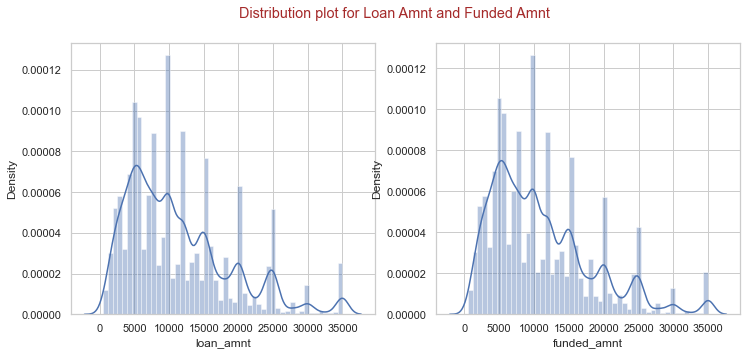

In [221]:
#Increasing the figure size of the plot
plt.figure(figsize=[12,5])
#Checking the values for loan_amnt using describe()
print("Loan Amnt\n", df_loan.loan_amnt.describe())
print("Funded Amount\n",df_loan.funded_amnt.describe())
#Using Subplots to show different graphs
plt.subplot(1,2,1)
#Create a dist plot for the loan_amnt and funded_amnt columns
sns.distplot(df_loan.loan_amnt)
#Create a historgram
plt.subplot(1,2,2)
sns.distplot(df_loan.funded_amnt)
plt.suptitle("Distribution plot for Loan Amnt and Funded Amnt",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

Distribution is almost similar so for further analysis we will use only funded_amnt

funded_amnt --> The total amount committed to that loan at that point in time.

loan_amnt --> The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

There is a chance that loan_amnt might not updated so will use only funded_amnt and will ignore loan_amnt column

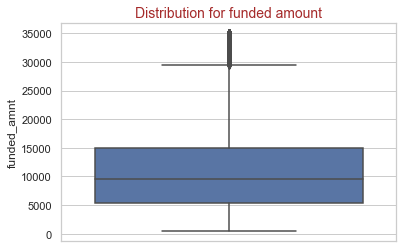

In [223]:
#Create box plot for funded_amnt column to check the distribution and any outliers
sns.boxplot(y=df_loan.funded_amnt)
plt.title("Distribution for funded amount",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

Most of the loan amounts taken are around 10000 and very few took 35000

count      39,715.00
mean       68,966.96
std        63,794.71
min         4,000.00
25%        40,402.00
50%        59,000.00
75%        82,298.00
max     6,000,000.00
Name: annual_inc, dtype: float64


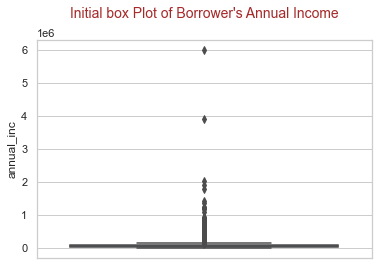

In [224]:
#Checking the values for annual income(annual_inc) using describe()
print(df_loan.annual_inc.describe())
#Create a box plot for the annual_inc column
sns.boxplot(y=df_loan.annual_inc)
plt.title("Initial box Plot of Borrower's Annual Income\n",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

Outliers are found. So remove these outlier values.

count    39,317.00
mean     65,522.06
std      35,215.37
min       4,000.00
25%      40,000.00
50%      58,000.00
75%      81,000.00
max     234,996.00
Name: annual_inc, dtype: float64


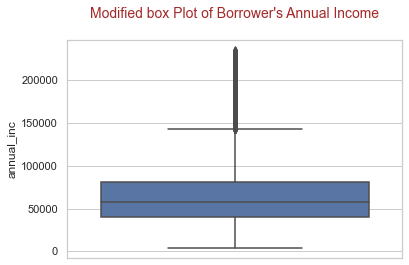

In [225]:
# Remove the outliers between 99% to 100%
df_loan = df_loan[df_loan["annual_inc"] < df_loan["annual_inc"].quantile(0.99)]
#Checking the values for annual income(annual_inc) using describe()
print(df_loan.annual_inc.describe())
#Create a box plot for the annual_inc column
sns.boxplot(y=df_loan.annual_inc)
plt.title("Modified box Plot of Borrower's Annual Income\n",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

count   39,317.00
mean       322.03
std        206.20
min         15.69
25%        166.22
50%        278.96
75%        426.10
max      1,305.19
Name: installment, dtype: float64


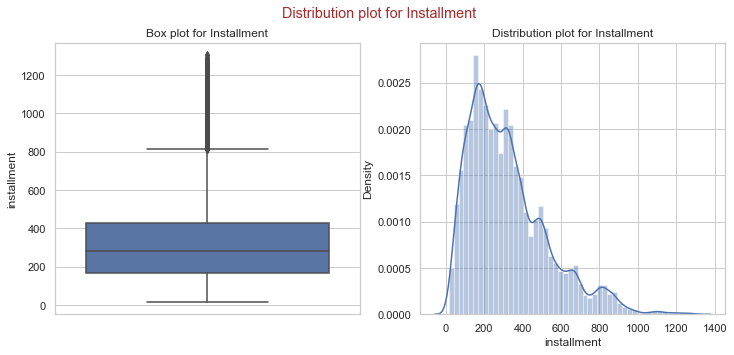

In [226]:
#Increasing the figure size of the plot
plt.figure(figsize=[12,5])
#Checking the values for installment using describe()
print(df_loan.installment.describe())
#Using Subplots to show different graphs
plt.subplot(1,2,1)
#Create a boxplot for the installment
sns.boxplot(y=df_loan.installment)
plt.title("Box plot for Installment")
#Create a historgram
plt.subplot(1,2,2)
#Create a dist plot for the installment
sns.distplot(df_loan.installment)
plt.title("Distribution plot for Installment")
plt.suptitle("Distribution plot for Installment",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

In [227]:
#df_loan[df_loan["installment"] > df_loan["installment"].quantile(0.99)]
#Even the outliers are seen as per box plot, Not deleting as the data looks proper. Even with 99% there are more than 300 rows.So, Keeping as it is.

count   39,317.00
mean        12.01
std          3.72
min          5.42
25%          9.25
50%         11.83
75%         14.54
max         24.59
Name: int_rate, dtype: float64


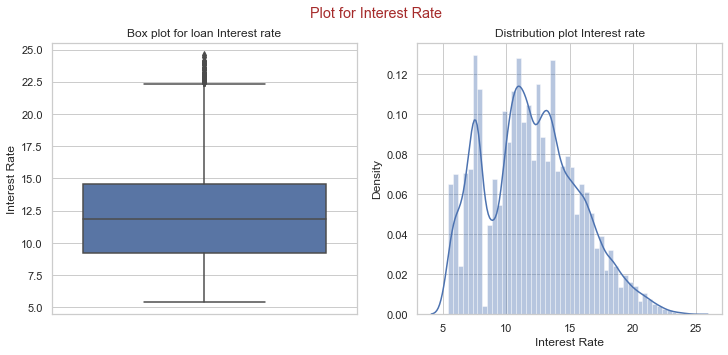

In [228]:
#Increasing the figure size of the plot
plt.figure(figsize=[12,5])
print(df_loan.int_rate.describe())
plt.subplot(1,2,1)
sns.boxplot(y=df_loan.int_rate)
plt.title("Box plot for loan Interest rate")
plt.ylabel("Interest Rate")
plt.subplot(1,2,2)
plt.title("Distribution plot Interest rate")
sns.distplot(df_loan.int_rate)
plt.xlabel("Interest Rate")
plt.suptitle("Plot for Interest Rate",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

Few outliers are seen but not deleting to them to make sure the statistics based on interest rate.

count   39,317.00
mean        13.38
std          6.66
min          0.00
25%          8.27
50%         13.48
75%         18.64
max         29.99
Name: debt_to_income, dtype: float64


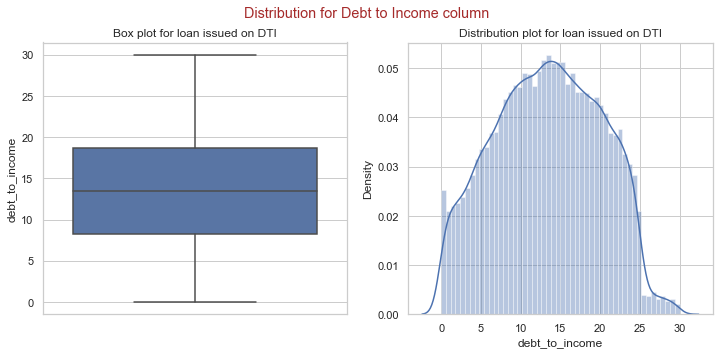

In [229]:
#Increasing the figure size of the plot
plt.figure(figsize=[12,5])
#Checking the values for debt_to_income(DTI) using describe()
print(df_loan.debt_to_income.describe())
#Using Subplots to show different graphs
plt.subplot(1,2,1)
plt.title("Box plot for loan issued on DTI")
#Create a box plot for the DTI column
sns.boxplot(y=df_loan.debt_to_income)
#Create a historgram
plt.subplot(1,2,2)
plt.title("Distribution plot for loan issued on DTI")
sns.distplot(df_loan.debt_to_income)
plt.suptitle("Distribution for Debt to Income column",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

No outliers are seen for Debt to income.

count   39,317.00
mean        48.76
std         28.34
min          0.00
25%         25.30
50%         49.20
75%         72.30
max         99.90
Name: revol_util, dtype: float64


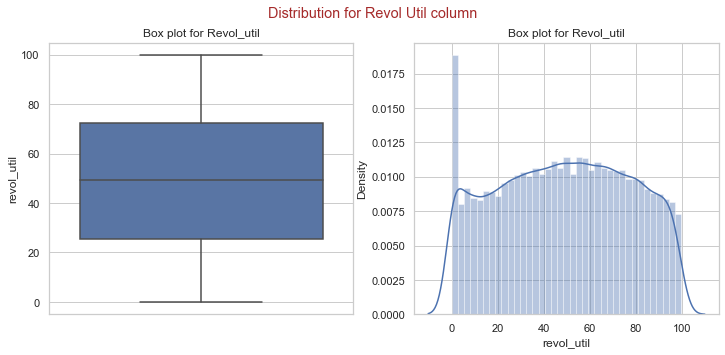

In [230]:
plt.figure(figsize=[12,5])
#Checking the values for revol_util using describe()
print(df_loan.revol_util.describe())
#Using Subplots to show different graphs
plt.subplot(1,2,1)
plt.title("Box plot for Revol_util")
#Create a box plot for the revol_util column
sns.boxplot(y=df_loan.revol_util)
#Create a historgram
plt.subplot(1,2,2)
plt.title("Box plot for Revol_util")
sns.distplot(df_loan.revol_util)
plt.suptitle("Distribution for Revol Util column",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

No outliers are noticed for revol_util column.

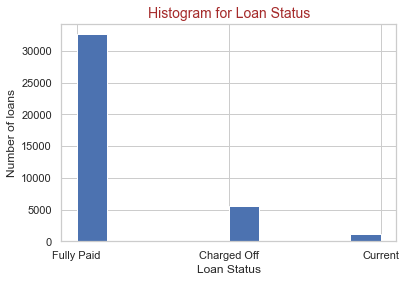

In [231]:
#Plt histogram for loan_Status to check the totally paid and charged off loans
plt.hist(df_loan.loan_status)
plt.title("Histogram for Loan Status",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Loan Status")
plt.ylabel("Number of loans")
plt.show()

Most of the loans are totally paid(30K+) and need to see what kind of factors are noticed where loans are charged off(5K+).

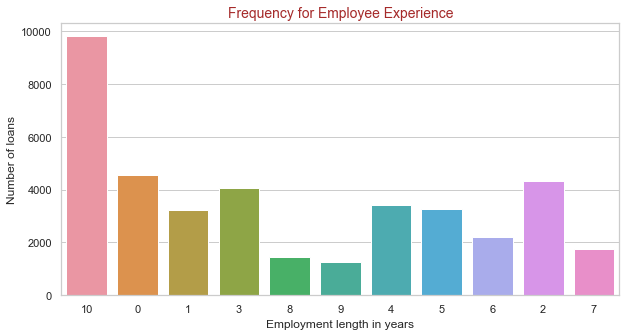

In [232]:
#Increasing the figure size of the plot
plt.figure(figsize=[10,5])
#count plot for Employee Experience to check which employess took major number of loans
sns.countplot(df_loan.employee_experience)
plt.title("Frequency for Employee Experience",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Employment length in years")
plt.ylabel("Number of loans")
plt.show()

Employees with 10Years of experience and above took major number of loans.

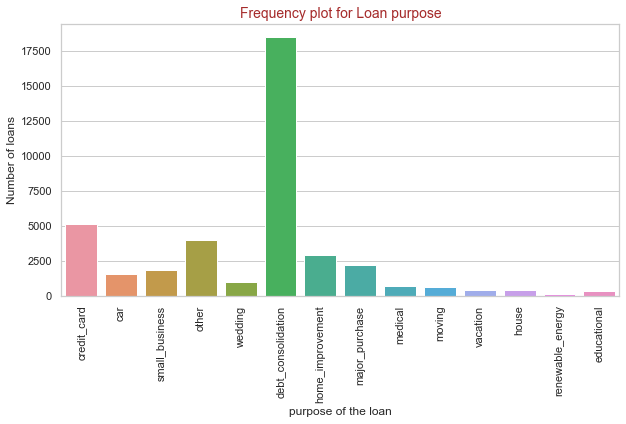

In [233]:
#Increasing the figure size of the plot
plt.figure(figsize=[10,5])
#count plot for purpose of the loan
sns.countplot(df_loan.purpose)
plt.title("Frequency plot for Loan purpose",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("purpose of the loan")
plt.ylabel("Number of loans")
plt.xticks(rotation=90)
plt.show()

Loans took for Debt_consolidation purpose are more when compared to others followed by credit_Card,other etc.

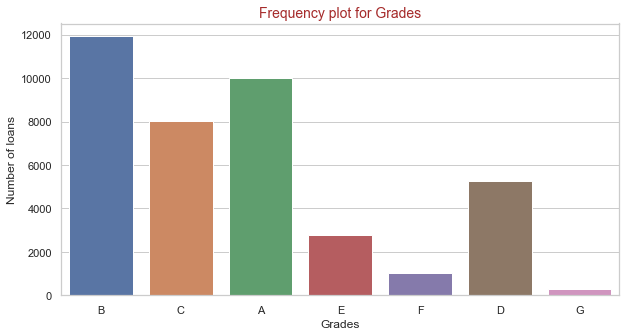

In [234]:
#Increasing the figure size of the plot
plt.figure(figsize=[10,5])
#count plot for grades
sns.countplot(df_loan.grade)
plt.title("Frequency plot for Grades",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Grades")
plt.ylabel("Number of loans")
plt.show()


Majority of the loan given were of Grade B then Grade A and then Grade C and so on.

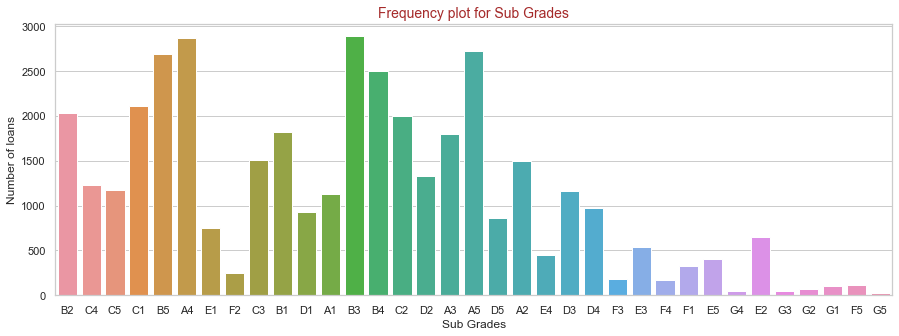

In [235]:
#Increasing the figure size of the plot
plt.figure(figsize=[15,5])
#count plot for Sub grades
sns.countplot(df_loan.sub_grade)
plt.title("Frequency plot for Sub Grades",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Sub Grades")
plt.ylabel("Number of loans")
plt.show()

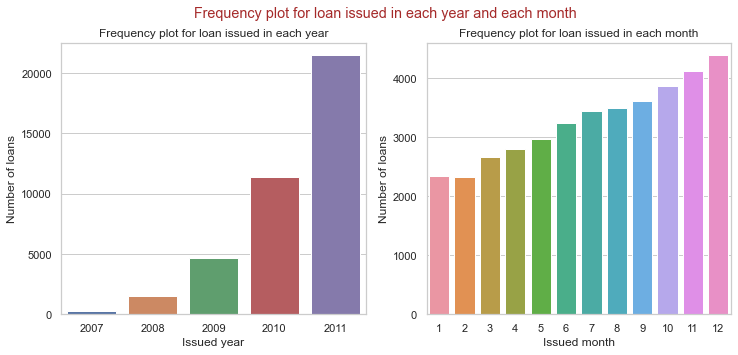

In [236]:
#Plots for Issuesd year and Issued month to check the trends
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
sns.countplot(df_loan.issued_year)
plt.title("Frequency plot for loan issued in each year")
plt.xlabel("Issued year")
plt.ylabel("Number of loans")

plt.subplot(1,2,2)
sns.countplot(df_loan.issued_month)
plt.title("Frequency plot for loan issued in each month")
plt.xlabel("Issued month")
plt.ylabel("Number of loans")
plt.suptitle("Frequency plot for loan issued in each year and each month",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

Number of loans are increasing each year and month.Linear trend towards both the columns.

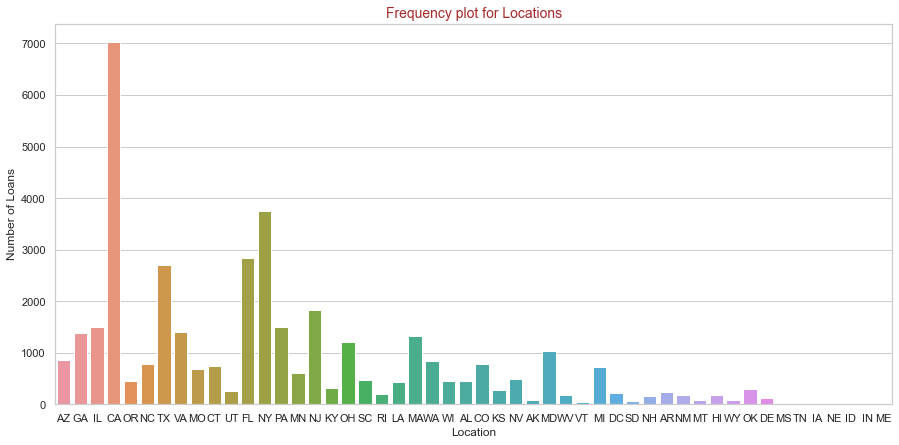

In [237]:
#Increasing the figure size of the plot
plt.figure(figsize=[15,7])
#Count plot for checking in which state most loans are taken
sns.countplot(df_loan.addr_state)
plt.title("Frequency plot for Locations",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Number of Loans")
plt.xlabel("Location")
plt.show()

State CA took more number of loans followed by NY, FL, TX etc.

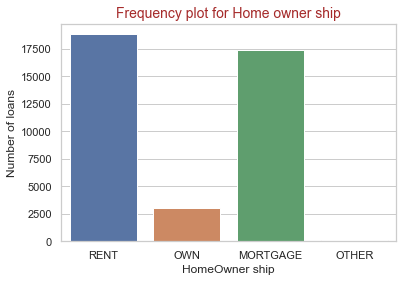

In [238]:
#home_ownership The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.So we can check and remove the rows with NONE as this is not a valid value.
#Check the rows with values where home_ownership is NONE
#Delete the rows with home_ownership NONE as the rows with NONE values are 3 in number
df_loan=df_loan[~(df_loan["home_ownership"] == "NONE")]
#Plot for Home owner ship
sns.countplot(df_loan.home_ownership)
plt.title("Frequency plot for Home owner ship",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("HomeOwner ship")
plt.ylabel("Number of loans")

plt.show()

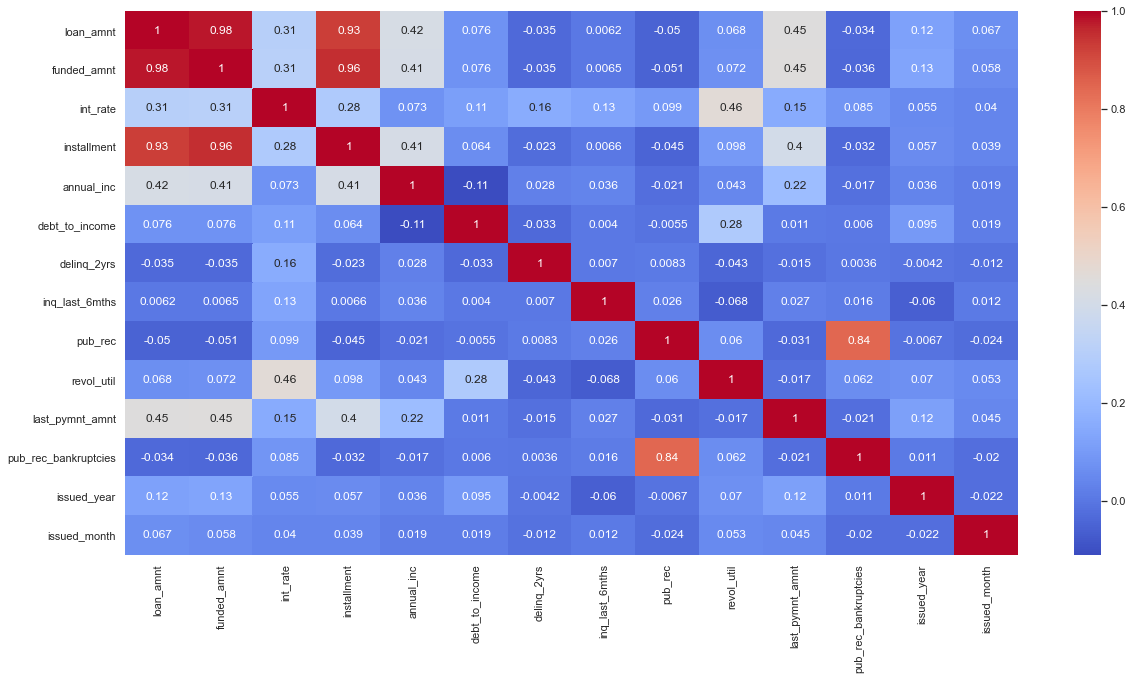

In [239]:
#correlation between variables
corr=sns.heatmap(df_loan.corr(),annot=True,cmap='coolwarm')
plt.show()

Installment and funded_amnt are highly correlated.

pub_rec and pub_rec_bankruptcies are highly correlated.

# BiVariate Analysis

In [240]:
# Derived columns
# categorise funded amounts into buckets which will help in analysis further in bivariate analysis.
df_loan['funded_amnt_category'] = pd.cut(df_loan['funded_amnt'], [0, 7000, 14000, 21000, 28000, np.inf], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 and above'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
df_loan["annual_inc_category"]=pd.cut(df_loan['annual_inc'],  [0, 25000, 50000, 75000, 100000,np.inf], labels=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
df_loan['int_rate_category'] = pd.cut(df_loan['int_rate'], [0, 5, 10, 15, 20, np.inf], labels=['0-5%', '5-10%', '10-15%', '15-20%', '20% and above'])

# categorise dti into buckets for bivariate analysis.
df_loan['debt_to_income_category'] = pd.cut(df_loan['debt_to_income'], [0, 5, 10, 15, 20, np.inf], labels=['0-5%', '5-10%', '10-15%', '15-20%', '20% and above'])

# categorise revol_uril into buckets for bivariate analysis.
df_loan['revol_util_category'] = pd.cut(df_loan['revol_util'], [0, 20, 40, 60, 80, np.inf], labels=['0-20%', '20-40%', '40-60%', '60-80%', '80% and above'])

df_loan.shape

(39314, 28)

In [241]:
#Function for Bivaraite Analysis w.rt to loan_Status.
##By default second column is consisdered as loan status as we are doing analysis for loan status

def bivariate_analysis(col):
    df_loan_crosstab = pd.crosstab(col,df_loan['loan_status'])
    df_loan_crosstab['sum_of_charged_off_and_fully_paid'] = df_loan_crosstab['Charged Off'] + df_loan_crosstab['Fully Paid']+df_loan_crosstab['Current']
    ### calculating percentages status wise. Not considering/showing Current percentage on plots as this is not important
    df_loan_crosstab['charged_off_percentage'] = round((df_loan_crosstab['Charged Off']/df_loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
    df_loan_crosstab['fully_paid_percentage'] = round((df_loan_crosstab['Fully Paid']/df_loan_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
    ######## dropping unnecessary columns in contingency table
    df_loan_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid','Current'], inplace=True)
    print(df_loan_crosstab)
    df_loan_crosstab.sort_values(by='charged_off_percentage').plot.bar(figsize=(14,7),  title=col.name.title()+' versus Loan Status')
    # Adding and formatting title
    plt.title(col.name.title()+' versus Loan Status\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
    # Labeling Axes
    plt.xlabel(col.name.title(), fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel("Loan status Percentages", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.show()

loan_status           charged_off_percentage  fully_paid_percentage
funded_amnt_category                                               
0-7000                                 13.09                  85.80
7000-14000                             13.18                  84.46
14000-21000                            16.13                  78.99
21000-28000                            18.04                  74.98
28000 and above                        20.53                  69.25


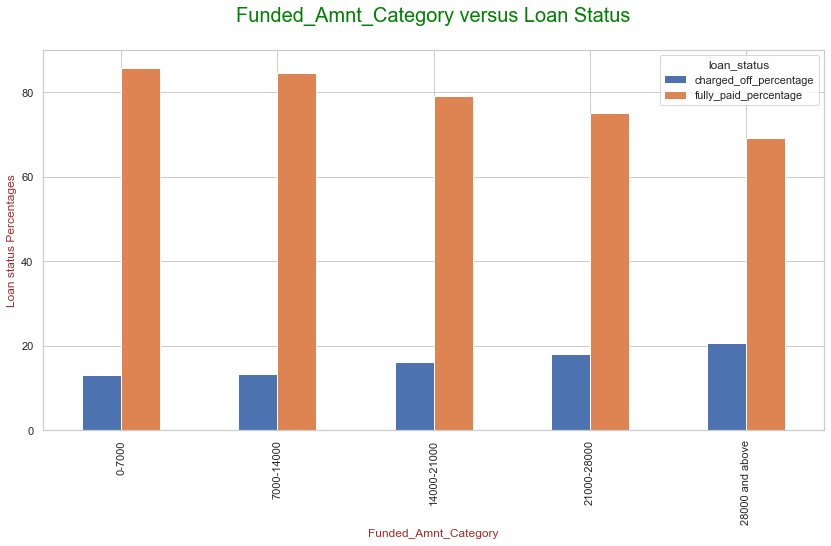

In [242]:
#Analysis for Funded_amnt
bivariate_analysis(df_loan['funded_amnt_category'])

If Funded Amount increases then percentage of charged off also increased.

loan_status          charged_off_percentage  fully_paid_percentage
annual_inc_category                                               
0-25000                               18.95                  80.04
25000-50000                           16.14                  81.36
50000-75000                           14.02                  83.00
75000-100000                          11.75                  84.74
100000 and above                      10.38                  85.98


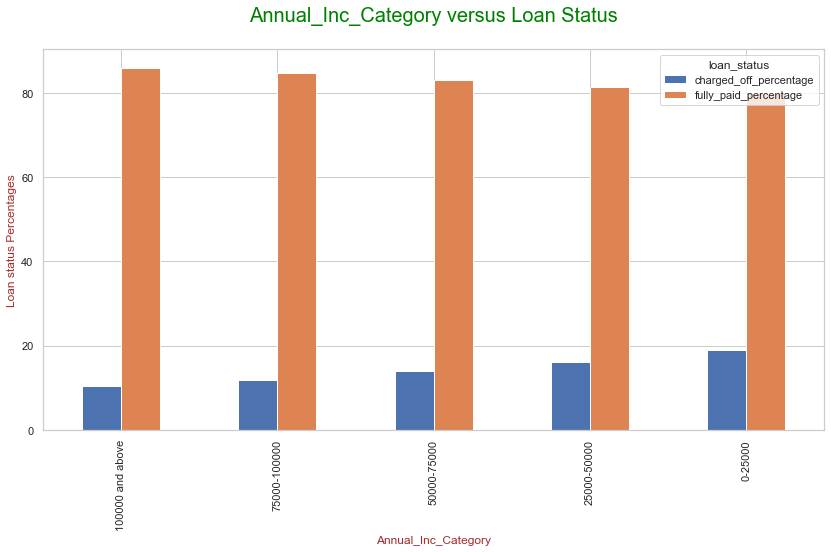

In [243]:
#Analysis for Annual income
bivariate_analysis(df_loan['annual_inc_category'])

If the annual income is less then loan charged off percentage increases.

loan_status        charged_off_percentage  fully_paid_percentage
int_rate_category                                               
5-10%                                6.71                  92.67
10-15%                              14.46                  82.72
15-20%                              23.51                  70.87
20% and above                       34.44                  53.68


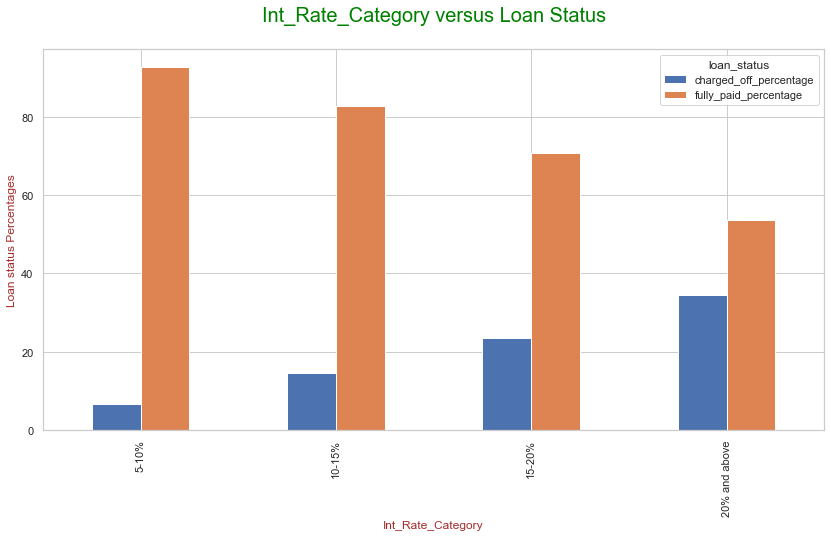

In [244]:
#Analysis for intrest rate
bivariate_analysis(df_loan['int_rate_category'])

If the interest rate is more then  charged off percentage increased.

loan_status              charged_off_percentage  fully_paid_percentage
debt_to_income_category                                               
0-5%                                      12.00                  86.13
5-10%                                     12.55                  85.04
10-15%                                    14.17                  83.10
15-20%                                    15.28                  81.61
20% and above                             16.08                  80.05


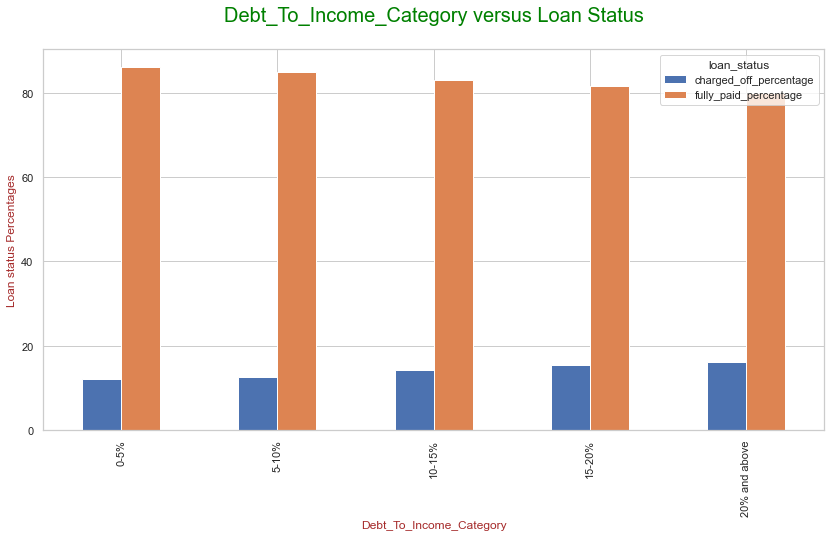

In [245]:
#Analysis for Debt to income
bivariate_analysis(df_loan['debt_to_income_category'])

There is no significant changes related to charged w.r.t DTI.

loan_status          charged_off_percentage  fully_paid_percentage
revol_util_category                                               
0-20%                                  9.03                  89.05
20-40%                                11.62                  85.61
40-60%                                14.30                  82.77
60-80%                                16.33                  80.24
80% and above                         19.51                  77.26


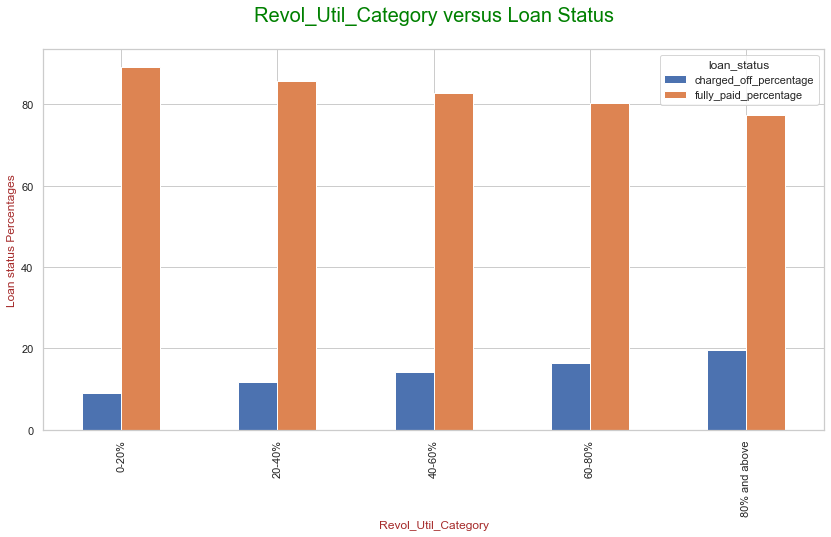

In [246]:
#Analysis for Revol Util
bivariate_analysis(df_loan['revol_util_category'])

loan_status          charged_off_percentage  fully_paid_percentage
employee_experience                                               
0                                     13.96                  84.42
1                                     14.16                  83.69
10                                    15.73                  79.91
2                                     12.92                  84.85
3                                     13.57                  84.41
4                                     13.37                  83.87
5                                     13.99                  83.34
6                                     13.81                  83.57
7                                     14.89                  81.58
8                                     13.89                  83.17
9                                     12.59                  84.84


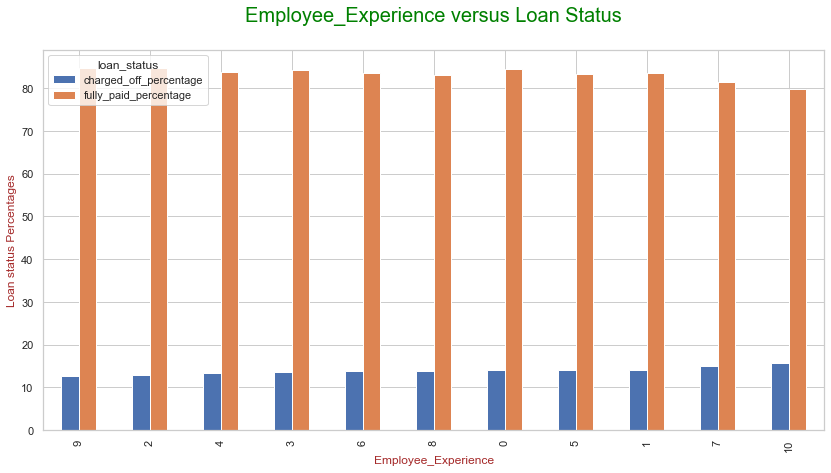

In [247]:
#Analysis for Employee Experience
bivariate_analysis(df_loan['employee_experience'])

Employees with experience 10+ years of experience are likely to default slightly.

loan_status         charged_off_percentage  fully_paid_percentage
purpose                                                          
car                                  10.38                  86.38
credit_card                          10.55                  87.44
debt_consolidation                   14.88                  81.99
educational                          17.03                  82.97
home_improvement                     11.68                  84.97
house                                15.63                  80.59
major_purchase                       10.16                  88.13
medical                              15.45                  82.80
moving                               15.77                  83.02
other                                15.90                  80.91
renewable_energy                     18.81                  80.20
small_business                       26.22                  69.65
vacation                             13.91                  84.51
wedding   

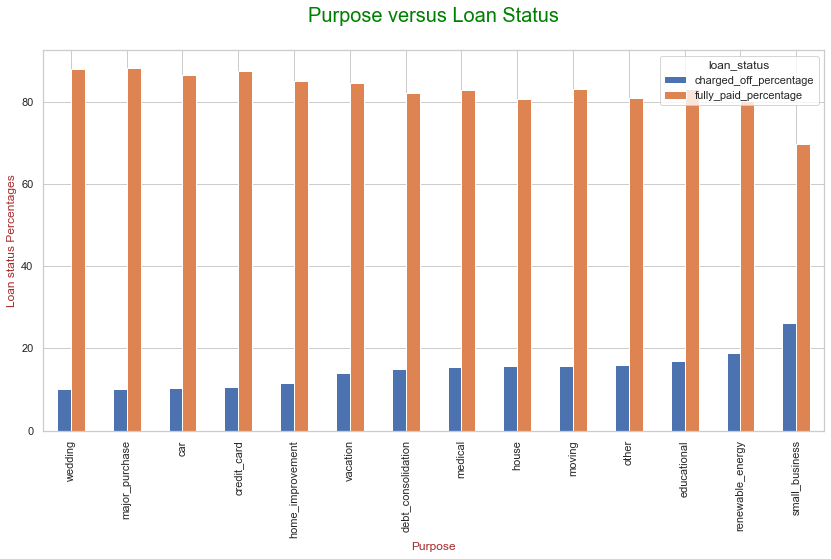

In [248]:
#Analysis for purpose of the loan.
bivariate_analysis(df_loan['purpose'])

Small_business purpose loans are charged off more followed by renewable energy,educational,other etc.

loan_status     charged_off_percentage  fully_paid_percentage
home_ownership                                               
MORTGAGE                         13.25                  83.14
OTHER                            18.75                  81.25
OWN                              14.53                  82.77
RENT                             15.01                  82.78


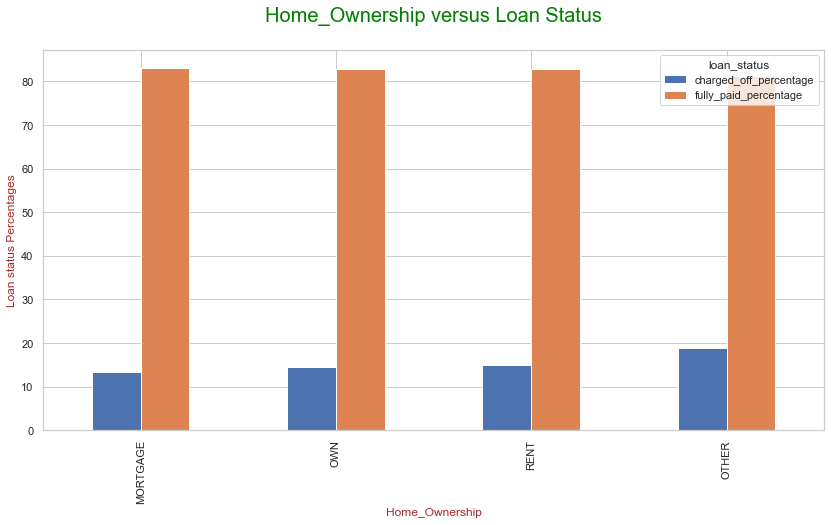

In [249]:
#Analysis for home owner ship
bivariate_analysis(df_loan['home_ownership'])

loan_status  charged_off_percentage  fully_paid_percentage
grade                                                     
A                              6.00                  93.60
B                             11.85                  85.26
C                             16.74                  79.99
D                             21.21                  74.68
E                             25.27                  68.41
F                             30.44                  62.63
G                             32.35                  62.09


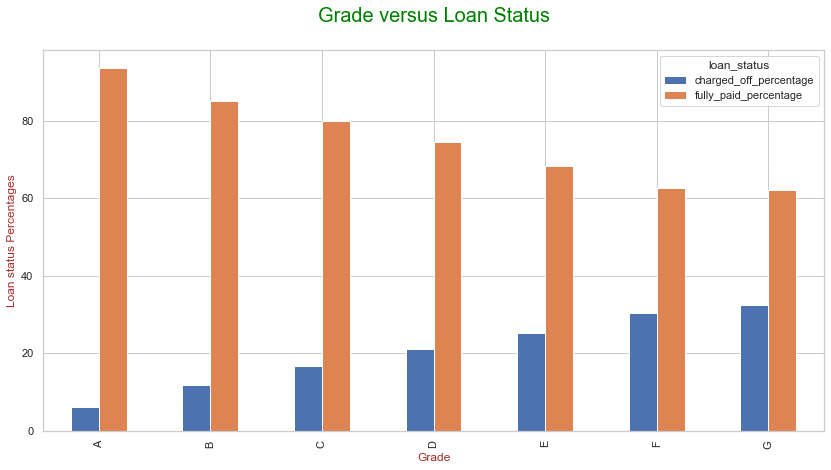

In [250]:
#Analysis for Grade
bivariate_analysis(df_loan['grade'])

loan_status  charged_off_percentage  fully_paid_percentage
sub_grade                                                 
A1                             2.65                  97.35
A2                             4.94                  95.06
A3                             5.73                  94.27
A4                             6.21                  93.34
A5                             7.94                  91.07
B1                             9.35                  88.83
B2                            11.06                  86.18
B3                            11.59                  85.22
B4                            13.13                  83.91
B5                            13.24                  83.45
C1                            15.76                  80.41
C2                            16.11                  79.97
C3                            17.81                  79.47
C4                            17.17                  80.39
C5                            17.76                  79.

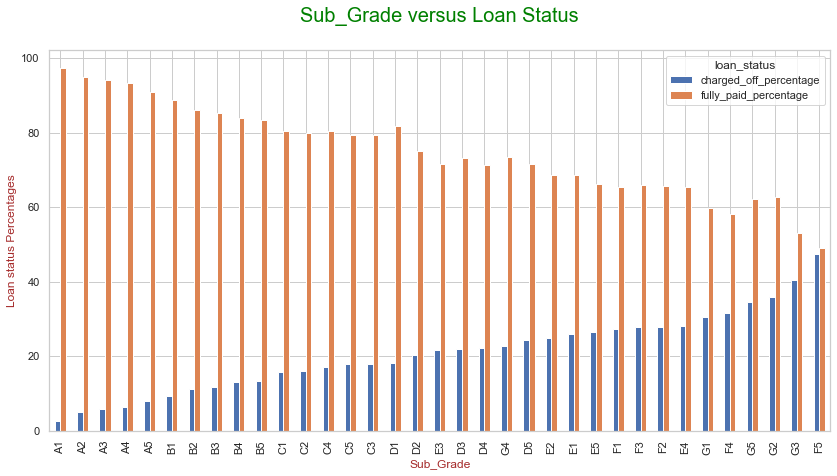

In [251]:
#Analysis for Subgrade
bivariate_analysis(df_loan['sub_grade'])

It is observed that the people with sub-grade as ‘F5’ are the topmost defaulters followed by G3, G2, G5 etc. Observing from comparison of grade with sub-grade, F grade has highest defaulters with sub-grade as F5 

Grades follows an order for charged off A<B<C<D<E<F<G. Even the subgrade confirms the same.  Althpough F5 has higher tendency But over all grades and subgrades follows above order.
                                                      
A grade loans are less charged off where as G grade loans are highly charged off.                                                     
 

loan_status     charged_off_percentage  fully_paid_percentage
term_in_months                                               
 36                              11.11                  88.89
 60                              22.70                  66.58


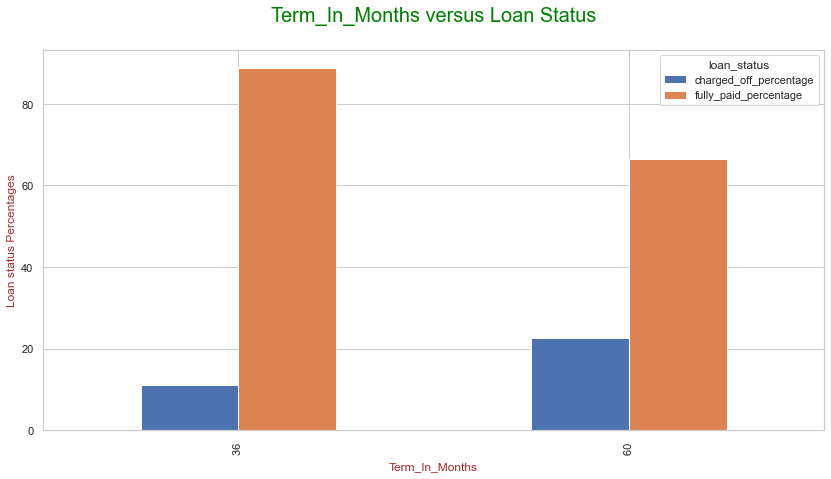

In [252]:
#Analysis for term of the loan.
bivariate_analysis(df_loan['term_in_months'])

Loans provided with 60 months as term are more likely to charged off.

loan_status          charged_off_percentage  fully_paid_percentage
verification_status                                               
Not Verified                          12.65                  86.00
Source Verified                       14.42                  82.48
Verified                              16.10                  79.21


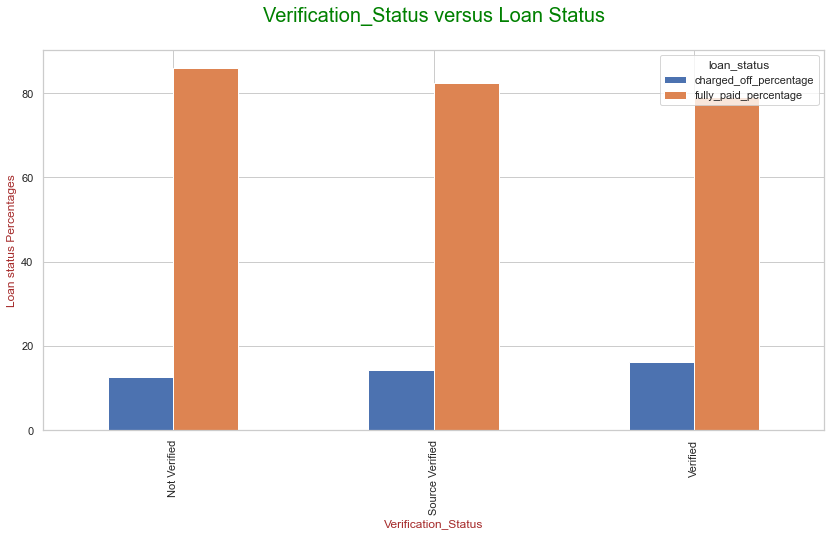

In [253]:
#Analysis for verfication status
bivariate_analysis(df_loan['verification_status'])

There is no much significance for verfication status and cannot confirm any significance..But Verified loans has little more tendency to default.

loan_status  charged_off_percentage  fully_paid_percentage
addr_state                                                
AK                            17.72                  79.75
AL                            12.03                  84.19
AR                            11.02                  84.90
AZ                            13.92                  82.62
CA                            15.86                  82.02
CO                            12.40                  84.27
CT                            12.77                  83.97
DC                             7.01                  91.59
DE                            10.53                  88.60
FL                            17.54                  79.46
GA                            15.49                  81.77
HI                            16.09                  79.31
IA                             0.00                 100.00
ID                            16.67                  83.33
IL                            13.02                  83.

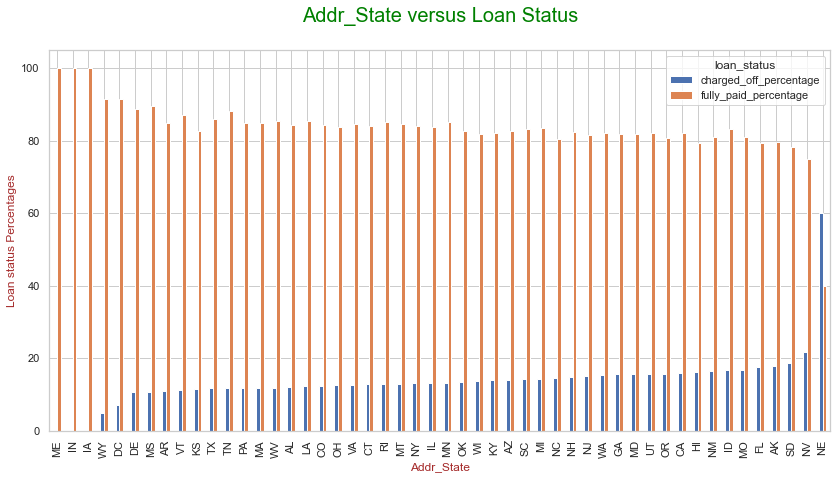

In [254]:
#Analysis for the State
bivariate_analysis(df_loan['addr_state'])

Charged off percentages are more in the following states NE, NV, SD, AK ,FL
But as per the data NE has only 3 rows. so cannot come to conclusion. But need to check the other states(NV,SD, AK, FL) while processing loan.

loan_status  charged_off_percentage  fully_paid_percentage
issued_year                                               
2007                          17.62                  82.38
2008                          15.86                  84.14
2009                          12.65                  87.35
2010                          12.84                  87.16
2011                          15.10                  79.64


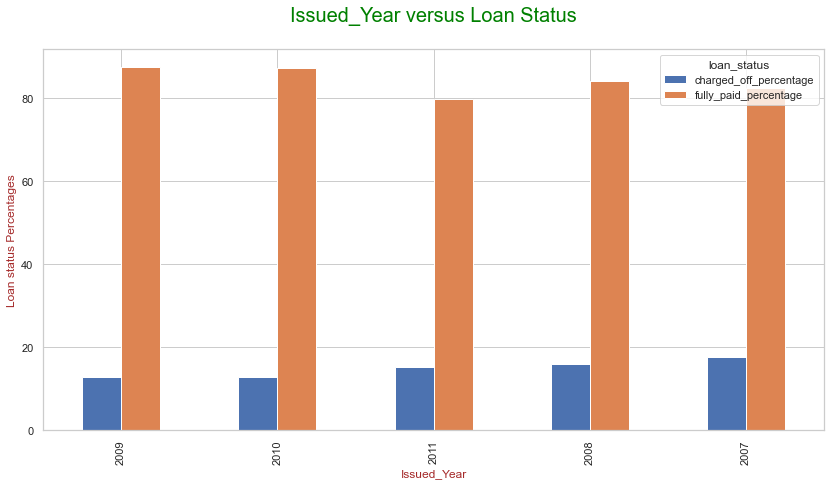

In [255]:
#Analysis for Issued year
bivariate_analysis(df_loan['issued_year'])

Except in year 2007 for rest all years charged off percentage increases.

loan_status   charged_off_percentage  fully_paid_percentage
issued_month                                               
1                              13.47                  86.53
2                              12.32                  87.68
3                              12.93                  87.03
4                              13.09                  86.81
5                              15.58                  81.79
6                              14.79                  82.16
7                              13.79                  82.64
8                              13.32                  82.98
9                              15.07                  80.81
10                             14.75                  80.89
11                             14.39                  81.78
12                             15.35                  79.71


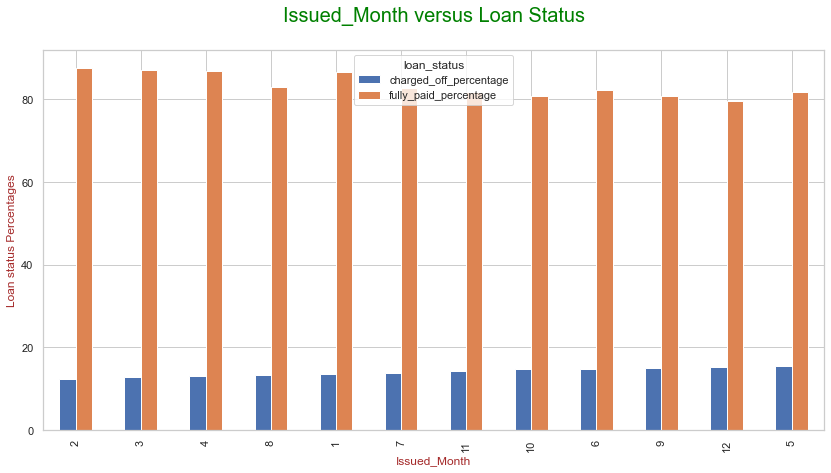

In [256]:
#Analysis for Issued month
bivariate_analysis(df_loan['issued_month'])

loan_status           charged_off_percentage  fully_paid_percentage
pub_rec_bankruptcies                                               
0.00                                   13.86                  83.25
1.00                                   21.86                  75.93
2.00                                   28.57                  42.86


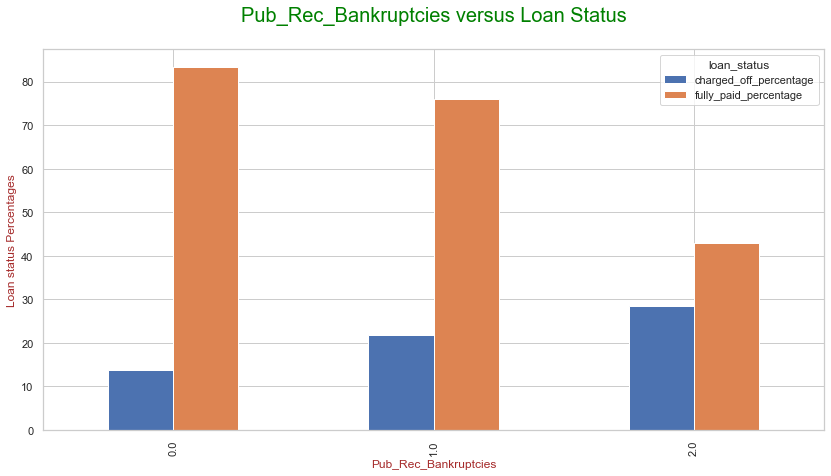

In [257]:
#Analysis for Public record bankruptcies
bivariate_analysis(df_loan['pub_rec_bankruptcies'])

Customer with public bankruptcy history of 1 or more is more likely to get default.

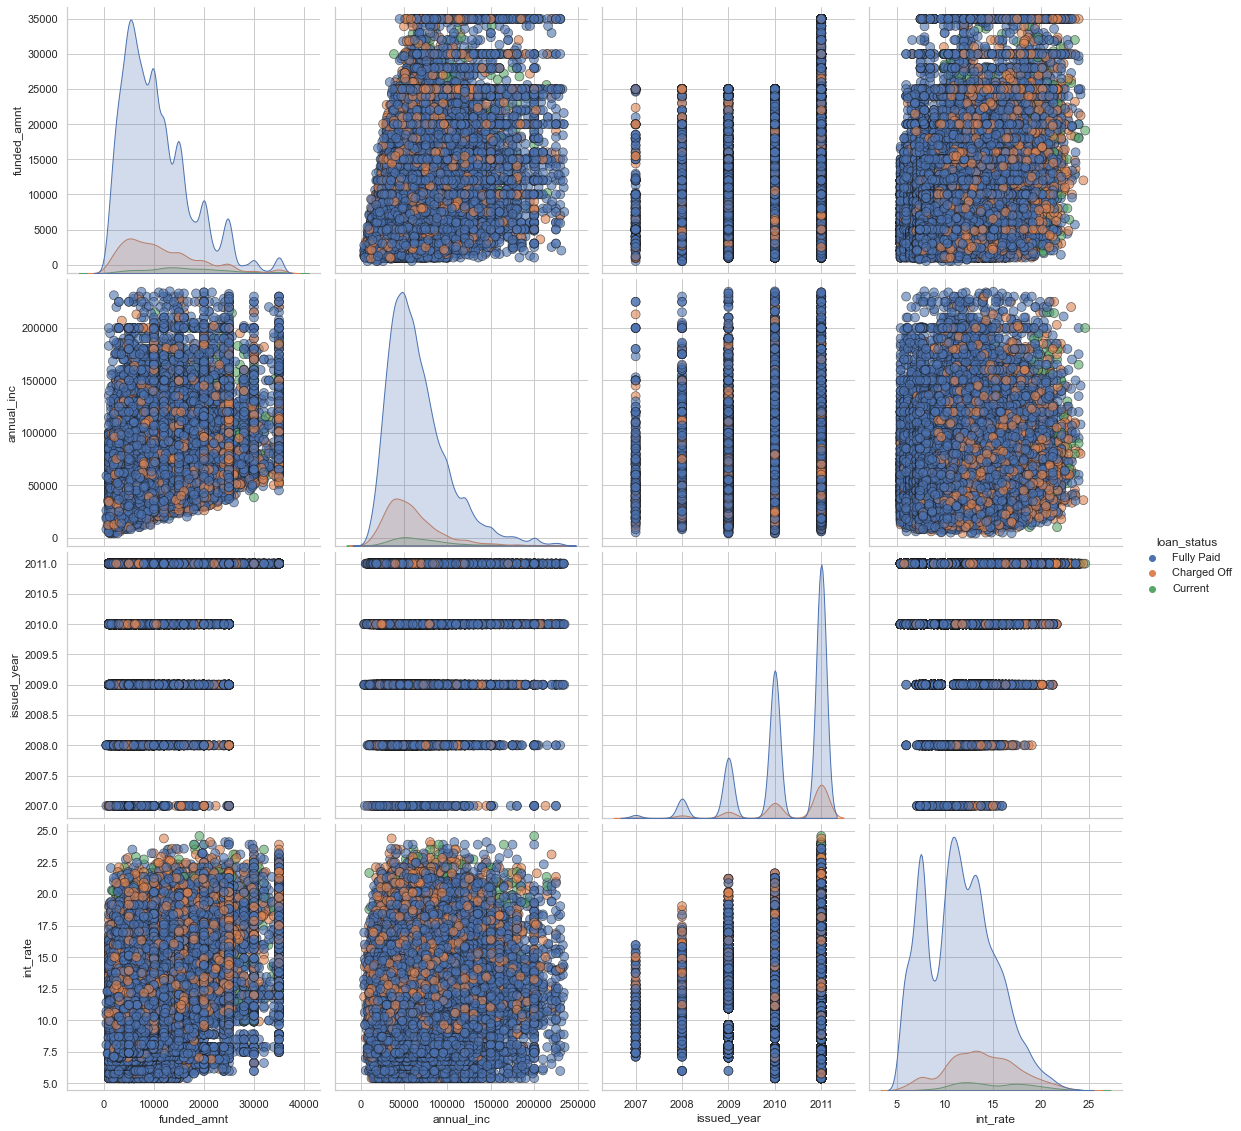

In [258]:
# Lets draw a pair plot for multivariate analysis
# Pick few imporatnt columns from dataset for analyzing

# Create a pair plot colored by loan status with a density plot of the # diagonal and format the scatter plots.
sns.pairplot(df_loan[['funded_amnt', 'annual_inc', 'issued_year','int_rate','loan_status']], hue = 'loan_status',size=4,plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.show()


Higher the intrest rate higher charged off ratio.

Higher the annual income higher the funded amount slightly.

intrest rate is increasing with funded amount increase.

Charged off loans are increasing with year.

### Over all Observations

After analyzing the data, below features were most indicatve of Defaulting Customers:-

1. interest_rate
2. annual_income
3. loan amount/ funded Amount
4. Purpose
5. Grades/Subgrades
6. Employee Experience
7. Term in months
8. revol_util